# Gradient Descent, Normal Equation and the math story.

In a world where data is becoming more valuable than gold, machine learning is trying to use this data for marketing, customer satisfaction, problem-solving and many many other reasons. However, the question arises, how we extract the maximum possible value from a given dataset? This is a question that I will attempt to tackle in this article.

In [1]:
# Import the required libraries
#
# import pandas
import pandas as pd
# import numpy
import numpy as np
np.seterr(all='warn')

# import matplotlib for visualization 
import matplotlib.pyplot as plt

# Read your collected data
data = pd.read_csv("car_pricing.csv")

# Project the first 5 rows of your data
data.head()

,car_name,horsepower,price
0,alfa-romero giulia,111,13495.0
1,alfa-romero stelvio,111,16500.0
2,alfa-romero Quadrifoglio,154,16500.0
3,audi 100 ls,102,13950.0
4,audi 100ls,115,17450.0


## Let's make a hypothesis, shall we?

Suppose we have a magic empty box. The way that magic box works is the following. We put a paper with a written value inside, and once we open it again, a new paper appears with a prediction. And that's the idea behind it.

The hypothesis is a formal way to describe our prediction function. It's a Greek word "υπόθεση", and it means "idea or explanation for something that is based on known facts but has not yet been proven". Therefore, our goal is, given a training set, to learn a function h: X → Y so that h(x) is a "good" predictor for the corresponding value of y.

<img src="./images/hypothesis_graph.png" alt="Hypothesis graph" />

When the variable that we want to estimate is continuous, such as car pricing, which will be our example for this article, we tend to call this learning problem a regression problem.

## Enter the cost function

In the previous section, we said that "… h(x) is a "good" predictor…". However, we haven't defined yet a way to calculate the accuracy of our hypothesis function. This measurement is calculated from the cost function. How we do that?

To make our prediction, we have a given set of data; it's called the training set. This dataset contains price samples from the automotive industry. The idea is to try to predict these values again using our hypothesis function and to calculate how far the prediction is from the real one.

<img src="./images/cost_function_eroor.png" alt="Cost function error" />

> There are plenty of metrics that measures how well our model performs. It will be the next article so stay tuned!

The metric that we will use is the MSE or Mean Squared Error. It's the most popular among the others for regression algorithms, and it looks like the following equation:


<img src="./images/metric_MSE.jpeg" alt="MSE metric" />

where:
* i - index of sample,
* ŷ - predicted value,
* y - expected value,
* n - number of samples in dataset.

As shown in the equation, the smaller the difference between the actual and predicted values of y, the lower the MSE. And that is the goal, to have the lowest possible MSE because of the fact that the cost function uses the MSE as a metric to estimate an average difference of all the results of the hypothesis with inputs from x's and the actual output y's.

Finally, the last piece to assemble the cost function is the regression line. We try to make a straight line (defined by hθ (x)) that passes through the data points. Since we are trying to draw a straight line, our formula will be:

\begin{equation}
h_{\theta}(x) = \theta_0 + \theta_1 x
\end{equation}

We are now ready to assemble the cost function by replacing y_hat with our hypothesis.

\begin{aligned}
J & = \frac{1}{2m} \sum_{n=1}^{n} (y_i - \hat{y_i})^2 \\ 
& = \frac{1}{2m} \sum_{n=1}^{n} (y_i - (\theta_0 + \theta_1 x_i) )^2 \\ 
& = \frac{1}{2m} \sum_{n=1}^{n} (y_i - h_{\theta}(x_i) )^2 
\end{aligned}

## Normal Equation

At this point in the article, I want to introduce the vectorization of the functions. The reason that we do such a thing is about the computational efficiency for library programming makes our formulas shorter and easier to read. Let's say that we have four cars whose prices we want to predict.

|   car_name	            |   horsepower	|   price	|
|:------------------------:	|:---------:	|:------:	|
|   alfa-romero giulia		|  111   	    |   13495.0	|
|   alfa-romero stelvio	    |  111       	|   16500.0	|
|   alfa-romero Quadrifoglio|  154      	|   16500.0	|
|   audi 100 ls		        |  102 	        |   13950.0	|

Our target variable(dependent variable) will be price and the independent variable will be the horsepower of the car.

Convert our features and target variables into matrixes, vectors:

\begin{aligned}
x = \begin{bmatrix} 111 \\ 111 \\ 154 \\ 102 \end{bmatrix} \xrightarrow{\text{add intercept point}} \begin{bmatrix} 1 & 111 \\ 1 & 111 \\ 1 & 154 \\ 1 & 102 \end{bmatrix}, y = \begin{bmatrix} 13495.0 \\ 16500.0 \\ 16500 \\ 13950.0 \end{bmatrix}, \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \end{bmatrix}
\end{aligned}

Multiply our features by our parameters:

\begin{align*}
h_\theta(x) = \begin{bmatrix} \theta_0 \hspace{2em} \theta_1 \end{bmatrix}\begin {bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix} = \theta^T x = \begin{bmatrix} \theta_0 + \theta_1 * 111 \\ \theta_0 + \theta_1 * 111 \\ \theta_0 + \theta_1 * 154 \\ \theta_0 + \theta_1 * 102 \end{bmatrix}
\end{align*}

Eh voila! This method will allow us to make massive prediction of our data set and make our cost function:

\begin{equation}
\min_{\theta_0, \theta_1} J(\theta) = \frac{1}{2m} \sum_{i=1}^n (y^{(i)} - h_{\theta}(x^{(i)}))^2
\end{equation}

to be more like:

\begin{equation}
J(\theta) = \frac{1}{2m} (X \theta - y)^T (X \theta - y)
\end{equation}

To simplify more the equation, we will use one of the matrix transpose identities $(AB)^T = B^T A^T$ and then we will use associative multipication.

\begin{aligned}
J(\theta) & = ((X \theta)^T - y^T)(X \theta - y) \\
& = (X \theta)^T X \theta - (X \theta)^T y - y^T (X \theta) + y^T y \\
\end{aligned}

Due to the second term and the third term are the same, we are able to add them:

\begin{equation}
J(\theta) =  \theta^T X^T X \theta - 2(X \theta)^T y + y^T y
\end{equation}

Then the question arises, how do we minimize this equation? The answer lies in graph analysis and Fermat's Theorem. The Extreme Value Theorem tells us that the minimum and maximum of a function must be where the derivative is either zero or non-existent. So, we need to find the derivative of the new $J(\theta)$ to be equal to 0.

\begin{equation}
A(\theta) = \theta^T X^T X \theta \\
B(\theta) = 2(X \theta)^T y \\
C(\theta) = y^T y \\
\end{equation}

$ \textrm{Find the derivative of A:}$

\begin{aligned}
A(\theta) &= \theta^T X^T X \theta \\
&= \begin{pmatrix}
  \theta_1 & \theta_2 & ... & \theta_n
\end{pmatrix} \begin{pmatrix}
   x_{11} & x_{21} & ... & x_{m1} \\
   x_{12} & x_{22} & ... & x_{m2} \\
... & ... & ... & ... \\
x_{1n} & x_{2n} & ... & x_{mn} \\
\end{pmatrix} \begin{pmatrix}
   x_{11} & x_{12} & ... & x_{1n} \\
   x_{12} & x_{22} & ... & x_{2n} \\
... & ... & ... & ... \\
x_{m1} & x_{m2} & ... & x_{mn} \\
\end{pmatrix}\begin{pmatrix}
  \theta_1 \\ \theta_2 \\ ... \\ \theta_n
\end{pmatrix} \\ \\
&=\begin{pmatrix}
  \theta_1 & \theta_2 & ... & \theta_n
\end{pmatrix} \begin{pmatrix}
   x_{11}^2 \theta1 & ... & x_{1n}^2 \theta_n \\
   x_{21}^2 \theta1 & ... & x_{2n}^2 \theta_n \\
... & ... & ...  \\
x_{n1}^2 \theta1 & ... & x_{nn}^2 \theta_n \\
\end{pmatrix} \\ \\
&=\theta_1 (x_{11}^2 \theta_1+ ... + x_{1n}^2 \theta_n) + ... + \theta_n(x_{n1}^2 \theta_1+ ... + x_{nn}^2 \theta_n) \\
\end{aligned}

$ \textrm{Therefore for each paramater n:}$

\begin{equation}
\frac{\partial A}{\partial \theta1} = 2 \theta_1 x_{11}^2 + 2 \theta_1 x_{12}^2 + ... + 2 \theta_1 x_{1n}^2
\end{equation}

$$\textrm{...}$$

\begin{equation}
\frac{\partial A}{\partial \theta_n} = 2 \theta_n x_{n1}^2 + 2 \theta_n x_{n2}^2 + ... + 2 \theta_n x_{nn}^2
\end{equation}

$ \textrm{And if we convert all of these derivates into vectors then:}$

\begin{equation}
\implies \tag{1}\frac{\partial A}{\partial \theta_n} = 2 \theta X^T X 
\end{equation}

$$\textrm{---}$$

$ \textrm{Find the derivatives of B:}$

\begin{aligned}
B(\theta) &= 2 (X \theta)^T y \\
&= 2 \left( \begin{pmatrix}
   x_{11} & x_{12} & ... & x_{1n} \\
   x_{21} & x_{22} & ... & x_{2n} \\
... & ... & ... & ... \\
x_{m1} & x_{m2} & ... & x_{mn} \\
\end{pmatrix}  \begin{pmatrix}
  \theta_1 \\ \theta_2 \\ ... \\ \theta_n
\end{pmatrix} \right)^T \begin{pmatrix}
  y_1 \\ y_2 \\ ... \\ y_m
\end{pmatrix} \\
&= 2(x_{11} \theta_1 + ... + x_{1n} \theta_n) y_1 + ... + 2(x_{m1} \theta_1 + ... + x_{mn} \theta_n) y_m
\end{aligned}

$ \textrm{Therefore for each paramater n:}$

\begin{equation}
\frac{\partial B}{\partial \theta1} = 2 (x_{11} y_1 + ... + x_{m1} y_m)
\end{equation}

$$\textrm{...}$$

\begin{equation}
\frac{\partial B}{\partial \theta_n} = 2 (x_{1n} y_1 + ... + x_{mn} y_m)
\end{equation}

$ \textrm{And if we convert all of these derivates into vectors then:}$

\begin{equation}
\tag{2}\frac{\partial B}{\partial \theta} = 2 X^T y
\end{equation}


$$\textrm{---}$$

$\textrm{The third term does not contain any}$ $\theta$ $\textrm{parameter and therefore the derivate of,}$

\begin{aligned}
C(\theta) = y^T y \\
\end{aligned}

$\textrm{will be zero:}$

\begin{equation}
\tag{3}\frac{\partial C}{\partial \theta} = 0 
\end{equation}

All the pieces are ready. Let's assemble the puzzle from equation (1),(2) and (3):

<img src="./images/normalEquation_assemble.png" alt="Assemble the normal equation" />

\begin{aligned}
\frac{\partial}{\partial \theta} J = 0 \xrightarrow{(1), (2), (3)} \space
& 2 X^T X \theta - 2 X^T y + 0 = 0 \\
& \iff 2X^T X \theta = 2 X^T y \\ 
& \iff X^T X \theta = X^T y \\
& \iff \theta = 2 (X^T X)^-1 X^T y \\  
\end{aligned}

This is the theory of the normal equation. However, we must test the method to prove that it works properly. It's time to apply it to our car pricing problem. First, we will initialize some variables and data. 

> Tip: Using this formula does not require any feature scaling, and you will get an exact solution in one calculation: there is no “loop until convergence”. 

In [2]:
# Initialize target variable
y = data['price'].to_numpy()

# initialize number of training examples
m = y.size

# Get your feautures
X = data
X = X[["horsepower"]].to_numpy()

# Add a column of intercept point
X = np.hstack((np.ones((m,1)), X))

Next, we will move on to the implementation of normal equation:

In [3]:
def normalEquation(X, y):
    """
    Computes the solution to linear regression using the normal equation formula.
    
    Parameters
    ----------
    X : array_like
        The dataset of shape (m x n+1).
    
    y : array_like
        The value at each data point. A vector of shape (m, ).
    
    theta : array_like
            A vector of shape (n+1, ) which represents the parameters.
    """
    
    # Initialize theta
    theta = np.zeros(X.shape[1])
    
    # Apply the formula
    theta = np.dot((np.linalg.inv(np.dot(X.T,X))),np.dot(X.T,y))
    
    # Return the theta parameters
    return theta

In [4]:
# Apply the normal equation
theta = normalEquation(X,y)

# print theta to screen
print('Theta found by  normal equation: {0}, {1}'.format(theta[0], theta[1]))


Theta found by  normal equation: -3721.7614943227672, 163.263060969648


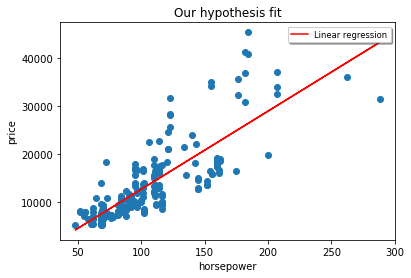

In [5]:
plt.scatter(data["horsepower"], data["price"])
plt.title("Our hypothesis fit")
plt.xlabel("horsepower")
plt.ylabel("price")

plt.plot(data["horsepower"], X.dot(theta), '-', label='Linear regression', color='red')
plt.legend(loc='upper right', shadow=True, fontsize='small', numpoints=1)

plt.show()

Finally, we will make prediction price for the Yaris which cost around 10,000 euros.

In [6]:
predict = np.dot([1, 72], theta)
print('For horsepower = 72, we predict that Yaris ACTIVE 2020 should cost: {:.2f} euros/dollars \n'.format(predict))

For horsepower = 72, we predict that Yaris ACTIVE 2020 should cost: 8033.18 euros/dollars 



## Gradient descent

Αnother way to find out the parameters that make our hypothesis perform well with our data is Gradient descent. I will use the example of my previous post to give you the idea of the method. Imagine standing on top of a valley with a ball in your hand. To find out how far this ball can go, we let it roll to the deepest part of the valley. Since at the beginning of the movement of the ball, the valley is steeper, the ball descent faster. However, as soon as it is about to reach the bottom, the surface will become more vertical, and the ball will slow down. We know that we have succeeded when our cost function is at the very bottom of the pits in our graph, i.e. when its value is the minimum.

<img src="./images/gradient_descent.png" alt="Gradient descent" />

Mathematically the method depends on the tangent created by the ball and the cost function. When the slope is negative, the value of $\theta_i$ increases and when it is positive, the value of $\theta_i$ decreases. So let's create the function based on this theory.

\begin{equation}
\theta_i := \theta_i - gradient
\end{equation}

From the calculus we know that the slope of a function is calculated by its derivative. Therefore our function will be as follows:

\begin{equation}
\theta_i := \theta_i - \frac{\partial}{\partial \theta_i} J(\theta_i)
\end{equation}

\begin{aligned}
\frac{\partial}{\partial \theta_i} J(\theta_i)
& = \frac{\partial}{\partial \theta_i} \frac{1}{2} ( h_{\theta}(x) - y)^2 \\
& = 2 \frac{1}{2}( h_{\theta}(x) - y) \frac{\partial}{\partial \theta_i}( h_{\theta}(x) - y) \\
& = ( h_{\theta}(x) - y) \frac{\partial}{\partial \theta_i} \sum\limits_{i=1}^{m}(\theta_i x_i - y) \\
& = ( h_{\theta}(x) - y) x_i
\end{aligned}

The scientists have gone one step further and add it one more variable to the derivate of the cost function J in order to accelarate the formula. This scalar make the gradient more or less steep to coverage faster to the minimum point and it's called learning rate.

\begin{equation}
\theta_i := \theta_i - \alpha \frac{\partial}{\partial \theta_i} J(\theta_i)
\end{equation}

The learning rate makes our equation powerful but it comes with a bit of a risk. The value of $\alpha$ can make gradient descent to coverage or not covarage at all. 

<img src="./images/learning_rate.jpeg" alt="Learning rate" />

In the first graph $\alpha$ is too small that makes our method slow. On the other hand, in case that $\alpha$ is too large the steps of each iteration will be that big that it will overshoot the minimum over and over. Therefore, it is suggested to try different values of $\alpha$ between -1 and 1 to find the sweet spot. Usally, the machine learning engineers use $\alpha=0.01$ or $\alpha=0.1$ and increase or decrease the learning rate from there.

As a result our gradient descent algorithm for two parameters will be:

\begin{align*} \text{repeat until convergence: } \lbrace & \newline \theta_0 := & \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}(h_\theta(x_{i}) - y_{i}) \newline \theta_1 := & \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m}\left((h_\theta(x_{i}) - y_{i}) x_{i}\right) \newline \rbrace& \end{align*}

That was the theory of gradient descent. It's about time to translate it into code!

Tip: Normalize your data : z= (xᵢ — μ)/σ

In [7]:
# Initialize target variable
y = data['price'].to_numpy()

# initialize number of training examples
m = y.size

# Reshape y or transpose it
y = y.reshape(m, 1)

# Get your feautures
X = data
X = X[["horsepower"]].to_numpy()

# Normalize your data
X_norm = X.copy()
mu = np.zeros(X.shape[1])
sigma = np.zeros(X.shape[1])

mu = np.mean(X, axis = 0)
sigma = np.std(X, axis = 0)
X_norm = (X - mu) / sigma
X = X_norm

# Add a column of intercept
X = np.hstack((np.ones((m,1)), X))

# Initialize fitting parameters
theta = np.zeros((2,1))

# Initialize gradient descent settings
iterations = 2000;
alpha = 0.001;

print(X)

[[ 1.          0.17448278]
 [ 1.          0.17448278]
 [ 1.          1.26453643]
 [ 1.         -0.05366798]
 [ 1.          0.27588312]
 [ 1.          0.14913269]
 [ 1.          0.14913269]
 [ 1.          0.14913269]
 [ 1.          0.90963524]
 [ 1.          1.41663694]
 [ 1.         -0.07901807]
 [ 1.         -0.07901807]
 [ 1.          0.42798363]
 [ 1.          0.42798363]
 [ 1.          0.42798363]
 [ 1.          1.9743388 ]
 [ 1.          1.9743388 ]
 [ 1.          1.9743388 ]
 [ 1.         -1.42257257]
 [ 1.         -0.8648707 ]
 [ 1.         -0.8648707 ]
 [ 1.         -0.91557087]
 [ 1.         -0.91557087]
 [ 1.         -0.05366798]
 [ 1.         -0.91557087]
 [ 1.         -0.91557087]
 [ 1.         -0.91557087]
 [ 1.         -0.05366798]
 [ 1.         -0.40856917]
 [ 1.          1.03638566]
 [ 1.         -1.16907172]
 [ 1.         -0.71277019]
 [ 1.         -1.11837155]
 [ 1.         -0.71277019]
 [ 1.         -0.71277019]
 [ 1.         -0.71277019]
 [ 1.         -0.71277019]
 

In [8]:
def computeCost(X, y, theta):
    """
    Compute cost for linear regression.
    
    Parameters
    ----------
    X : array_like
        The values that represents the input features + the intercept point
        of shape (m x n+1), where m is the number of examples, and n is the
        number of features.
    y : array_like
        The target variable. It is a vector of shape (m, ).
    
    theta : array_like
        A vector of shape (n+1, ) which represents the parameters.
    
    Returns
    -------
    J : float - The value of the cost function.
    
    """
    
    # number of training examples
    m = np.size(y, axis=0)
    
    # Initialize cost variable
    J = 0
    
    # initialize hypothesis
    h_theta = np.dot(X, theta)
    
    # Calculate the cost
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    
    # Return Cost
    return J

def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta
    
    Parameters
    ----------
    X : array_like
        The values that represents the input features + the intercept point
        of shape (m x n+1), where m is the number of examples, and n is the
        number of features.
    y : array_like
        The target variable. It is a vector of shape (m, ).
    
    theta : array_like
        A vector of shape (n+1, ) which represents the parameters.
    
    Returns
    -------
    theta: array_like - The optimal parameters
    J_history : array_like - The history of the cost.
    
    """
    # number of training examples
    m = np.size(y, axis=0)
    
    # Initialize some useful values
    J_history = []
    
    # are passed by reference to functions
    theta = theta.copy()
    
    for iter in range(num_iters):
        # initialize hypothesis
        h_theta = np.dot(X, theta)

        # calculate the thetas
        # (2,1) = (2,1) - ( 2, 1454  ).dot(1454x1 )
        theta = theta - (alpha / m) * (X.T).dot(h_theta - y)
        
        # Save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

Print the theta cost and theta and compare the results with normal equation.

In [9]:
# run gradient descent
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

# print theta to screen
print('Theta found by gradient descent: {0}, {1}'.format(theta[0], theta[1]))

Theta found by gradient descent: [11481.70029204], [5569.60294698]


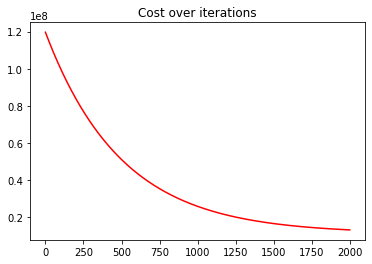

In [10]:
plt.title("Cost over iterations")
plt.plot(J_history, label='Cost function', color='red')

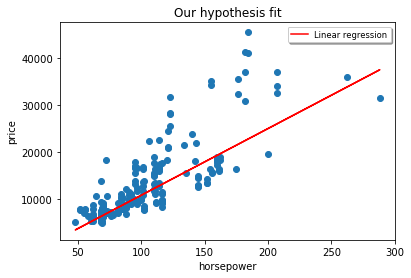

In [11]:
plt.scatter(data["horsepower"], data["price"])
plt.title("Our hypothesis fit")
plt.xlabel("horsepower")
plt.ylabel("price")

plt.plot(data["horsepower"], X.dot(theta), '-', label='Linear regression', color='red')
plt.legend(loc='upper right', shadow=True, fontsize='small', numpoints=1)

plt.show()

In [12]:
X_yaris = (72 - mu) / sigma
X_yaris = np.array([1, X_yaris[0]])

predict = X_yaris.dot(theta)
print('For horsepower = 72, we predict that Yaris ACTIVE 2020 should cost: {:.2f} euros/dollars \n'.format(predict[0]))

For horsepower = 72, we predict that Yaris ACTIVE 2020 should cost: 6947.09 euros/dollars 



## Conclusion

It's cheaper to get a Yaris ACTIVE by using gradient descent, so consider to suggest it to your car dealer! Beside that, normal equation is an accurate method that finds the global minimun but the inversion term make the calculation hard. Therefore if your dataset it's to large you will need to much computer power to make it happen. On the other hand gradient descent it's a simple concept that can be applied regardless of the size of your dataset. 

Hope that you enjoyed it as much as I did, thank you!